## 2D Example

### Using traditional calculations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='petal_length', ylabel='petal_width'>

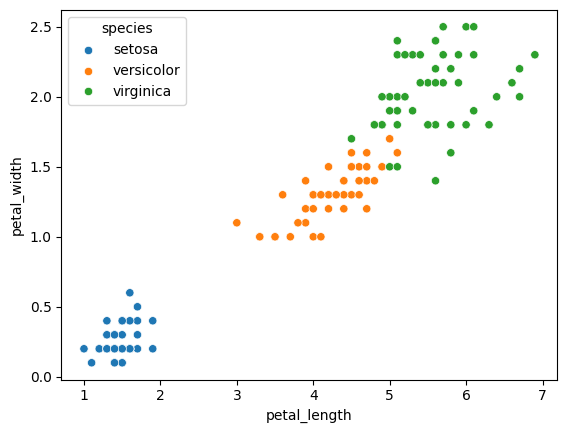

In [3]:
iris = sns.load_dataset('iris')
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

In [27]:
# Simplify by finding standard deviations first
n = len(iris)
sx = iris['petal_length'].std()
sy = iris['petal_width'].std()

# Find the correlation coefficient
zx = (iris['petal_length']-iris['petal_length'].mean())/sx
zy = (iris['petal_width']-iris['petal_width'].mean())/sy
r = np.sum(zx*zy)/(n-1)

# Find the slope
theta1 = r*sy/sx

# Find the bias
theta0 = iris['petal_width'].mean() - theta1*iris['petal_length'].mean()

print(theta0, theta1)

-0.3630755213190293 0.4157554163524116


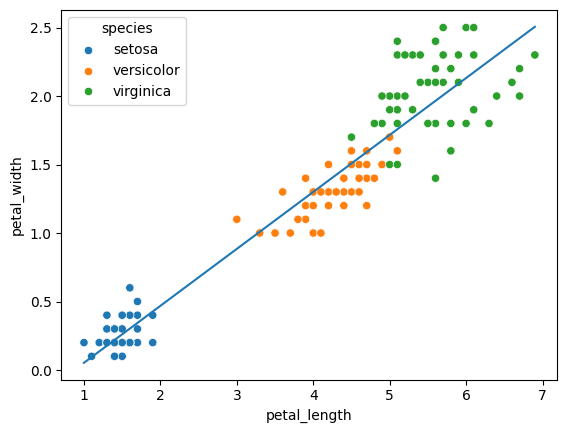

In [5]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

x = np.linspace(iris['petal_length'].min(), iris['petal_length'].max(), 100)
f = theta0 + theta1*x

plt.plot(x,f)

### Using the SVD method

In [26]:
X = np.array([[1, p] for p in iris['petal_length']])
y = np.array([l for l in iris['petal_width']])

U,S,VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
A_dagger = VT.T @ np.linalg.inv(S) @ U.T
Theta = np.matmul(A_dagger, y)

Theta

array([-0.36307552,  0.41575542])

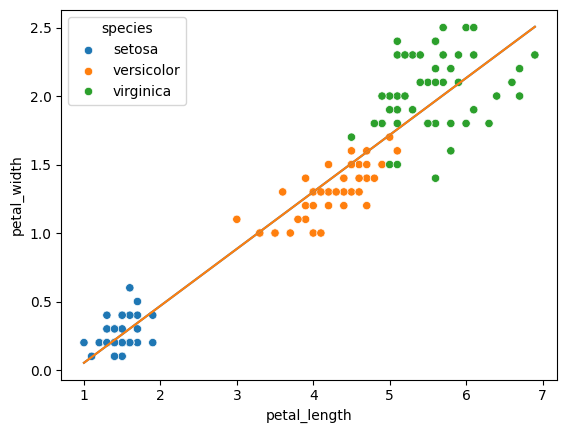

In [28]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.plot(x,f)

g = Theta[0] + Theta[1]*x
plt.plot(x,g)

## Multi-dimensional Example